# WeatherPy

The scatter plots depict that near the Equator there is little temperature fluctuation, though there is a dramatic difference in rainfall and humidity. Humidity increases as we approach the equator. Its cloudy at this moment and rainfall is very high in the tropical regions. The wind speed is not much affected by the distance from the equator, it’s almost moderate throughout the globe. In conclusion, an equatorial climate is a type of tropical climate in which there is no dry season. It is usually found at latitudes within five degrees of the equator and tropical rainforest is the natural vegetation.

In [1]:
# Dependencies
import requests as req
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from citipy import citipy
import time

In [2]:
# Create random numbers for latitudes
latitude = np.random.uniform(low = -90, high = 90,size = 2000)
# latitude

# Create random numbers for longitudes
longitude = np.random.uniform(low = -180, high = 180,size = 2000)
# longitude

# Zip longitude and latidude arrays to get the coordinates
coordinates = list(zip(latitude, longitude))
# coordinates

# Generate Cities List

In [3]:
# Create an empty list of world cities and repective countries
WorldCities = []
Countries = []

# Find the nearest city corresponding to the above coordinates
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    name = citipy.nearest_city(lat, lon).city_name
    country_code = citipy.nearest_city(lat, lon).country_code
    WorldCities.append(name)
    Countries.append(country_code)
WorldCities_data = pd.DataFrame({"City":WorldCities, "Country":Countries})  

# Drop any duplicate values
WorldCities_data = WorldCities_data.drop_duplicates('City')

# Visualize the data frame
WorldCities_data.head()

,City,Country
0,zhezkazgan,kz
1,amderma,ru
2,rikitea,pf
3,jamestown,sh
4,geraldton,ca


In [4]:
# Add columns to the data frame
WorldCities_data["Lat"] = ""
WorldCities_data["Lon"] = ""
WorldCities_data["Date"] = ""
WorldCities_data["Humidity"] = ""
WorldCities_data["Max Temp"] = ""
WorldCities_data["Wind Speed"] = ""
WorldCities_data["Cloudiness"] = ""

# Visualize the data frame
WorldCities_data.head()

,City,Country,Lat,Lon,Date,Humidity,Max Temp,Wind Speed,Cloudiness
0,zhezkazgan,kz,,,,,,,
1,amderma,ru,,,,,,,
2,rikitea,pf,,,,,,,
3,jamestown,sh,,,,,,,
4,geraldton,ca,,,,,,,


# Perform API Calls

In [5]:
# OpenWeatherMap API Key
api_key = "6531fb771bd4c6120244bdacb4b0a890"

# Set the initial row count to zero
row_count = 0

print("**********************")
print("BEGINNING DATA RETRIEVAL")
print("**********************")

# Loop through the cities and perform API Calls
for index, row in WorldCities_data.iterrows():
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&appid=%s" %(row["City"], api_key)
    response = req.get(target_url).json()
    print("----------------------")
    print("Now retrieving city #%s: %s" % (row_count + 1, WorldCities_data.loc[index]["City"]))
    print(target_url)
    row_count += 1
    
    try:     
        WorldCities_data.set_value(index, "Lat", response["coord"]["lat"])
        WorldCities_data.set_value(index, "Lon", response["coord"]["lon"])
        WorldCities_data.set_value(index, "Date", response["dt"])
        WorldCities_data.set_value(index, "Humidity", response["main"]["humidity"])
        WorldCities_data.set_value(index, "Max Temp", response["main"]["temp_max"])
        WorldCities_data.set_value(index, "Wind Speed", response["wind"]["speed"])
        WorldCities_data.set_value(index, "Cloudiness", response["clouds"]["all"])
           
    except:
        print("Missing details... skip.")
        
    if row_count % 50 == 0:
        print("**********************")
        print("PAUSE FOR 30 SECONDS")
        print("**********************")
        time.sleep(30)
        
print("**********************")
print("DATA RETRIEVAL COMPLETE")
print("**********************")



**********************
BEGINNING DATA RETRIEVAL
**********************
----------------------
Now retrieving city #1: zhezkazgan
http://api.openweathermap.org/data/2.5/weather?q=zhezkazgan&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #2: amderma
http://api.openweathermap.org/data/2.5/weather?q=amderma&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #3: rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #4: jamestown
http://api.openweathermap.org/data/2.5/weather?q=jamestown&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #5: geraldton
http://api.openweathermap.org/data/2.5/weather?q=geraldton&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #6: luanda
http://api.openweathermap.org/d

----------------------
Now retrieving city #49: sorong
http://api.openweathermap.org/data/2.5/weather?q=sorong&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #50: narsaq
http://api.openweathermap.org/data/2.5/weather?q=narsaq&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
**********************
PAUSE FOR 30 SECONDS
**********************
----------------------
Now retrieving city #51: bengkulu
http://api.openweathermap.org/data/2.5/weather?q=bengkulu&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #52: bethel
http://api.openweathermap.org/data/2.5/weather?q=bethel&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #53: awbari
http://api.openweathermap.org/data/2.5/weather?q=awbari&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #54: sterling
http://api.openweathermap.org/data/2.5/weather?

----------------------
Now retrieving city #97: jonuta
http://api.openweathermap.org/data/2.5/weather?q=jonuta&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #98: sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?q=sao jose da coroa grande&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #99: longyearbyen
http://api.openweathermap.org/data/2.5/weather?q=longyearbyen&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #100: jardim
http://api.openweathermap.org/data/2.5/weather?q=jardim&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
**********************
PAUSE FOR 30 SECONDS
**********************
----------------------
Now retrieving city #101: monrovia
http://api.openweathermap.org/data/2.5/weather?q=monrovia&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #102: nikol

----------------------
Now retrieving city #145: tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #146: kuche
http://api.openweathermap.org/data/2.5/weather?q=kuche&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #147: palabuhanratu
http://api.openweathermap.org/data/2.5/weather?q=palabuhanratu&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #148: lovozero
http://api.openweathermap.org/data/2.5/weather?q=lovozero&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #149: la ronge
http://api.openweathermap.org/data/2.5/weather?q=la ronge&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #150: iqaluit
http://api.openweathermap.org/data/2.5/weather?q=iqaluit&units=IMPERIAL&appid=6531f

----------------------
Now retrieving city #193: chokurdakh
http://api.openweathermap.org/data/2.5/weather?q=chokurdakh&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #194: fare
http://api.openweathermap.org/data/2.5/weather?q=fare&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #195: hervey bay
http://api.openweathermap.org/data/2.5/weather?q=hervey bay&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #196: morondava
http://api.openweathermap.org/data/2.5/weather?q=morondava&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #197: oum hadjer
http://api.openweathermap.org/data/2.5/weather?q=oum hadjer&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #198: izmalkovo
http://api.openweathermap.org/data/2.5/weather?q=izmalkovo&units=IMPERIAL&appid=6531f

----------------------
Now retrieving city #241: oktyabrskiy
http://api.openweathermap.org/data/2.5/weather?q=oktyabrskiy&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #242: tabou
http://api.openweathermap.org/data/2.5/weather?q=tabou&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #243: castro
http://api.openweathermap.org/data/2.5/weather?q=castro&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #244: san pedro
http://api.openweathermap.org/data/2.5/weather?q=san pedro&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #245: dunedin
http://api.openweathermap.org/data/2.5/weather?q=dunedin&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #246: sao filipe
http://api.openweathermap.org/data/2.5/weather?q=sao filipe&units=IMPERIAL&appid=6531fb771bd4c

----------------------
Now retrieving city #289: orcopampa
http://api.openweathermap.org/data/2.5/weather?q=orcopampa&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #290: tura
http://api.openweathermap.org/data/2.5/weather?q=tura&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #291: kahului
http://api.openweathermap.org/data/2.5/weather?q=kahului&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #292: qaanaaq
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #293: nizwa
http://api.openweathermap.org/data/2.5/weather?q=nizwa&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #294: clyde river
http://api.openweathermap.org/data/2.5/weather?q=clyde river&units=IMPERIAL&appid=6531fb771bd4c6120244bda

----------------------
Now retrieving city #338: princeton
http://api.openweathermap.org/data/2.5/weather?q=princeton&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #339: mahina
http://api.openweathermap.org/data/2.5/weather?q=mahina&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #340: santa cruz
http://api.openweathermap.org/data/2.5/weather?q=santa cruz&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #341: port blair
http://api.openweathermap.org/data/2.5/weather?q=port blair&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #342: san javier
http://api.openweathermap.org/data/2.5/weather?q=san javier&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #343: haradok
http://api.openweathermap.org/data/2.5/weather?q=haradok&units=IMPERIAL&appid=6531f

----------------------
Now retrieving city #387: coxim
http://api.openweathermap.org/data/2.5/weather?q=coxim&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #388: acapulco
http://api.openweathermap.org/data/2.5/weather?q=acapulco&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #389: yumen
http://api.openweathermap.org/data/2.5/weather?q=yumen&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #390: banda aceh
http://api.openweathermap.org/data/2.5/weather?q=banda aceh&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #391: ustupo
http://api.openweathermap.org/data/2.5/weather?q=ustupo&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #392: grande prairie
http://api.openweathermap.org/data/2.5/weather?q=grande prairie&units=IMPERIAL&appid=6531fb771bd4c

----------------------
Now retrieving city #436: cayenne
http://api.openweathermap.org/data/2.5/weather?q=cayenne&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #437: yulara
http://api.openweathermap.org/data/2.5/weather?q=yulara&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #438: mitsamiouli
http://api.openweathermap.org/data/2.5/weather?q=mitsamiouli&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #439: nguiu
http://api.openweathermap.org/data/2.5/weather?q=nguiu&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #440: yanam
http://api.openweathermap.org/data/2.5/weather?q=yanam&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #441: aberdeen
http://api.openweathermap.org/data/2.5/weather?q=aberdeen&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb

----------------------
Now retrieving city #485: benghazi
http://api.openweathermap.org/data/2.5/weather?q=benghazi&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #486: tarabuco
http://api.openweathermap.org/data/2.5/weather?q=tarabuco&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #487: tateyama
http://api.openweathermap.org/data/2.5/weather?q=tateyama&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #488: labuhan
http://api.openweathermap.org/data/2.5/weather?q=labuhan&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #489: egvekinot
http://api.openweathermap.org/data/2.5/weather?q=egvekinot&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #490: alta floresta
http://api.openweathermap.org/data/2.5/weather?q=alta floresta&units=IMPERIAL&appid=653

Now retrieving city #534: tabuk
http://api.openweathermap.org/data/2.5/weather?q=tabuk&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #535: muzhi
http://api.openweathermap.org/data/2.5/weather?q=muzhi&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #536: kalmunai
http://api.openweathermap.org/data/2.5/weather?q=kalmunai&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #537: tirumullaivasal
http://api.openweathermap.org/data/2.5/weather?q=tirumullaivasal&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #538: doha
http://api.openweathermap.org/data/2.5/weather?q=doha&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #539: piacabucu
http://api.openweathermap.org/data/2.5/weather?q=piacabucu&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
-------

----------------------
Now retrieving city #582: cuza voda
http://api.openweathermap.org/data/2.5/weather?q=cuza voda&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #583: iglino
http://api.openweathermap.org/data/2.5/weather?q=iglino&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #584: alta
http://api.openweathermap.org/data/2.5/weather?q=alta&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #585: jurm
http://api.openweathermap.org/data/2.5/weather?q=jurm&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #586: colares
http://api.openweathermap.org/data/2.5/weather?q=colares&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #587: yeppoon
http://api.openweathermap.org/data/2.5/weather?q=yeppoon&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
--

----------------------
Now retrieving city #631: palana
http://api.openweathermap.org/data/2.5/weather?q=palana&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #632: baykit
http://api.openweathermap.org/data/2.5/weather?q=baykit&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #633: santander
http://api.openweathermap.org/data/2.5/weather?q=santander&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #634: dandong
http://api.openweathermap.org/data/2.5/weather?q=dandong&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #635: san quintin
http://api.openweathermap.org/data/2.5/weather?q=san quintin&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #636: meadow lake
http://api.openweathermap.org/data/2.5/weather?q=meadow lake&units=IMPERIAL&appid=6531fb771

----------------------
Now retrieving city #679: yilan
http://api.openweathermap.org/data/2.5/weather?q=yilan&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #680: malwan
http://api.openweathermap.org/data/2.5/weather?q=malwan&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #681: newport
http://api.openweathermap.org/data/2.5/weather?q=newport&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #682: puerto escondido
http://api.openweathermap.org/data/2.5/weather?q=puerto escondido&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #683: tallahassee
http://api.openweathermap.org/data/2.5/weather?q=tallahassee&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #684: birao
http://api.openweathermap.org/data/2.5/weather?q=birao&units=IMPERIAL&appid=6531fb771

----------------------
Now retrieving city #727: kurumkan
http://api.openweathermap.org/data/2.5/weather?q=kurumkan&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #728: port keats
http://api.openweathermap.org/data/2.5/weather?q=port keats&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #729: kaeo
http://api.openweathermap.org/data/2.5/weather?q=kaeo&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #730: mus
http://api.openweathermap.org/data/2.5/weather?q=mus&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #731: mildura
http://api.openweathermap.org/data/2.5/weather?q=mildura&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb4b0a890
----------------------
Now retrieving city #732: oranjemund
http://api.openweathermap.org/data/2.5/weather?q=oranjemund&units=IMPERIAL&appid=6531fb771bd4c6120244bdacb

In [6]:
# Display the WorldCities data frame
WorldCities_data.head()

,City,Country,Lat,Lon,Date,Humidity,Max Temp,Wind Speed,Cloudiness
0,zhezkazgan,kz,47.78,67.77,1505446328,76,49.91,3.6,0
1,amderma,ru,69.75,61.65,1505446329,88,35.33,10.98,0
2,rikitea,pf,-23.12,-134.97,1505446329,100,71.24,7.96,92
3,jamestown,sh,42.1,-79.24,1505444160,100,60.8,4.7,1
4,geraldton,ca,-28.77,114.6,1505444400,44,77,8.05,0


In [7]:
# Drop all values that contain null values
WorldCities_data = WorldCities_data.dropna()

# Convert Timestamp to DateTime for Pandas DataFrame
WorldCities_data['Date'] = pd.to_datetime(WorldCities_data['Date'], unit='s')

# Display the WorldCities data frame
WorldCities_data.head()

,City,Country,Lat,Lon,Date,Humidity,Max Temp,Wind Speed,Cloudiness
0,zhezkazgan,kz,47.78,67.77,2017-09-15 03:32:08,76,49.91,3.6,0
1,amderma,ru,69.75,61.65,2017-09-15 03:32:09,88,35.33,10.98,0
2,rikitea,pf,-23.12,-134.97,2017-09-15 03:32:09,100,71.24,7.96,92
3,jamestown,sh,42.1,-79.24,2017-09-15 02:56:00,100,60.8,4.7,1
4,geraldton,ca,-28.77,114.6,2017-09-15 03:00:00,44,77,8.05,0


In [8]:
# Check number of cities in the data frame
WorldCities_data.count()

City          768
Country       768
Lat           768
Lon           768
Date          768
Humidity      768
Max Temp      768
Wind Speed    768
Cloudiness    768
dtype: int64

In [9]:
# Export to csv
WorldCities_data.to_csv("WorldCities_data.csv", index=False)

# Latitude vs Temperature Plot

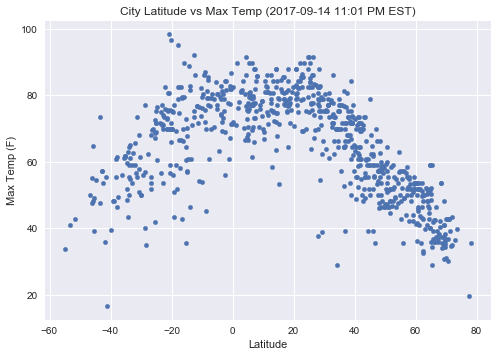

In [10]:
# Create scatter plot - Latitude vs Temperature
WorldCities_data.plot.scatter(["Lat"], ["Max Temp"], marker ='o', facecolors ="b", alpha = 1)

# Chart title
plt.title("City Latitude vs Max Temp (2017-09-14 11:30 PM EST)")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Max Temp (F)")

# Save an image of the chart and print to screen
plt.savefig("City Latitude vs Max Temp.png")
plt.show()

# Latitude vs Humidity Plot

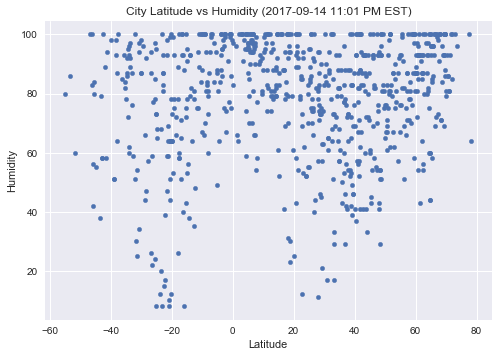

In [11]:
# Create scatter plot - Latitude vs Humidity
WorldCities_data.plot.scatter(["Lat"], ["Humidity"], marker ='o', facecolors ="b", alpha = 1)

# Chart title
plt.title("City Latitude vs Humidity (2017-09-14 11:30 PM EST)")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Humidity")

# Save an image of the chart and print to screen
plt.savefig("City Latitude vs Humidity.png")
plt.show()

# Latitude vs Cloudiness Plot¶

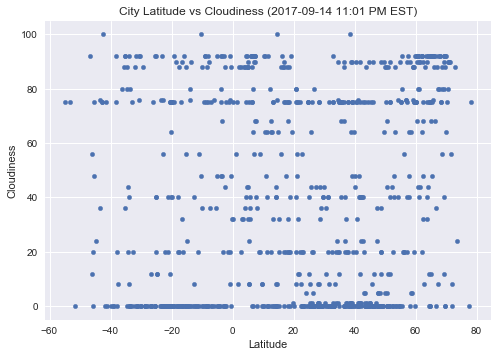

In [12]:
# Create scatter plot - Latitude vs Cloudiness
WorldCities_data.plot.scatter(["Lat"], ["Cloudiness"], marker ='o', facecolors ="b", alpha = 1)

# Chart title
plt.title("City Latitude vs Cloudiness (2017-09-14 11:30 PM EST)")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Cloudiness")

# Save an image of the chart and print to screen
plt.savefig("City Latitude vs Cloudiness.png")
plt.show()

# Latitude vs Wind Speed Plot¶

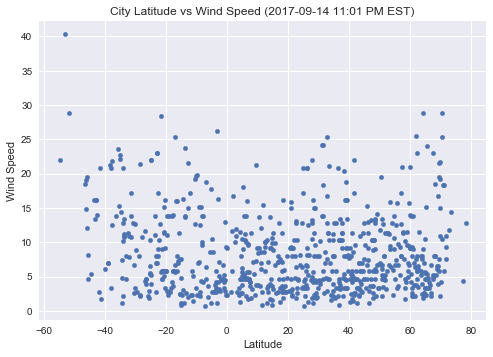

In [13]:
# Create scatter plot - Latitude vs Humidity
WorldCities_data.plot.scatter(["Lat"], ["Wind Speed"], marker ='o', facecolors ="b", alpha = 1)

# Chart title
plt.title("City Latitude vs Wind Speed (2017-09-14 11:30 PM EST)")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Wind Speed")

# Save an image of the chart and print to screen
plt.savefig("City Latitude vs Wind Speed.png")
plt.show()